https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [6]:
df['week'].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [7]:
df['week'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
343     True
344     True
345     True
346     True
347     True
Name: week, Length: 348, dtype: bool

In [8]:
# clases

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_label = df.copy()
df_label['week'] = le.fit_transform(df['week'])
df_label['week'].values

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

In [10]:
from sklearn.preprocessing import OneHotEncoder

df_ohe = pd.DataFrame(df['week'])

print(df_ohe)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit(df_ohe)

transformed_X_train = ohe.transform(df_ohe)
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['week']), index=df_ohe.index)

      week
0      Fri
1      Sat
2      Sun
3      Mon
4     Tues
..     ...
343   Tues
344    Wed
345  Thurs
346    Fri
347    Sat

[348 rows x 1 columns]


c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
transformed_df.columns = transformed_df.columns.str.replace("week_", "")

In [12]:
transformed_df

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
343,0.0,0.0,0.0,0.0,0.0,1.0,0.0
344,0.0,0.0,0.0,0.0,0.0,0.0,1.0
345,0.0,0.0,0.0,0.0,1.0,0.0,0.0
346,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6
transformed_df = pd.get_dummies(df['week'], dtype=int)
transformed_df

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [14]:
df_label

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [15]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [16]:
df_agrupado = df_label.groupby("month", as_index=False)

In [17]:
df_media = pd.DataFrame(df_agrupado["temp_1"].mean())
df_media

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [18]:
# merge del dataframe anterior con el original
df_merged = df_label.merge(df_media, on="month").drop(['year', 'day', 'week'], axis=1)

In [19]:
df_merged

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


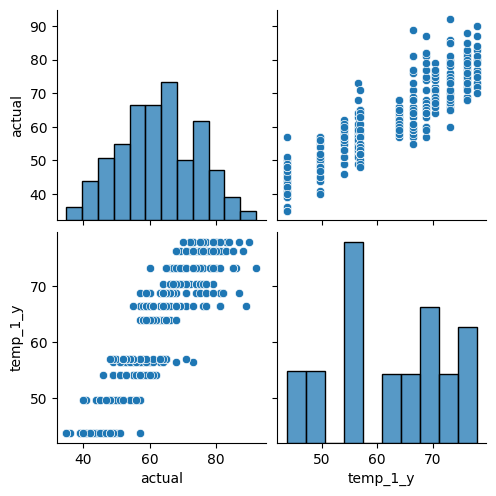

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_merged[['actual', 'temp_1_y']])

In [21]:
# %pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [22]:
# %pip install install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


<Axes: >

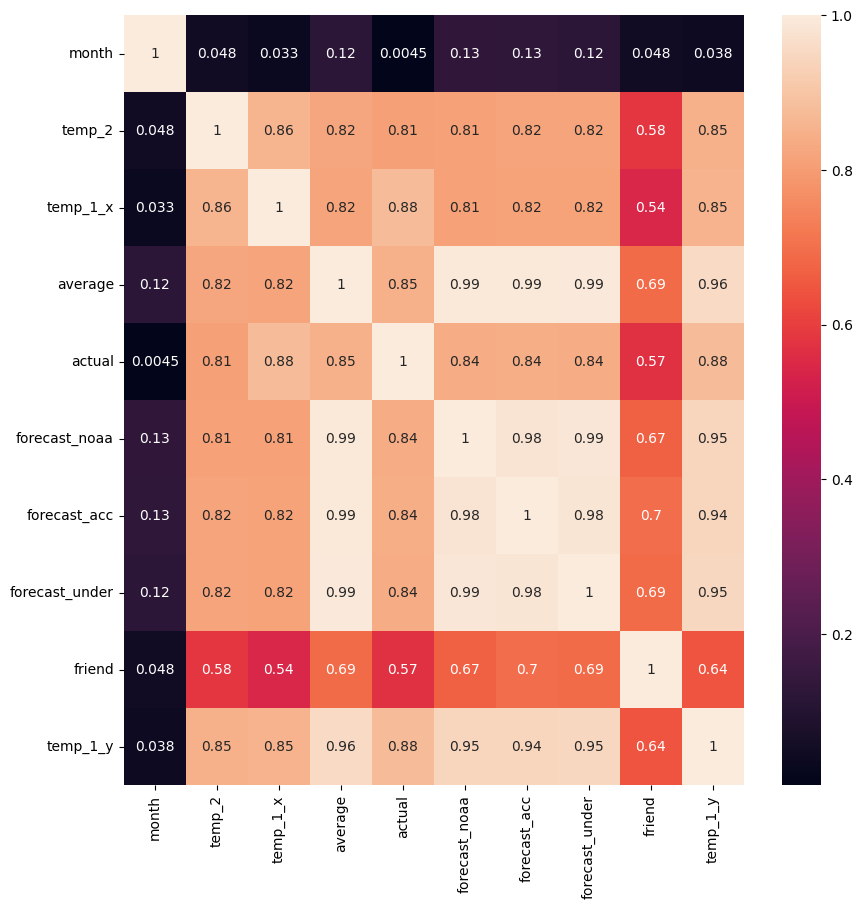

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_merged.corr(), annot=True)

### 3. Divide en train y test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_merged.drop('actual',axis=1), df_merged['actual'], test_size=0.2, random_state=42)

### 4. Entrena el modelo


In [50]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [52]:
dtr.feature_importances_

array([0.01566802, 0.03017908, 0.76559745, 0.11114601, 0.01086051,
       0.01957862, 0.02718859, 0.0156058 , 0.00417592])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [53]:
y_pred_train = dtr.predict(X_test)

In [54]:
y_pred_train

array([77., 68., 57., 62., 76., 76., 73., 79., 59., 82., 68., 67., 39.,
       60., 78., 55., 65., 56., 55., 79., 63., 55., 70., 60., 63., 49.,
       66., 45., 58., 77., 66., 62., 56., 90., 73., 60., 51., 51., 74.,
       45., 77., 54., 81., 40., 58., 75., 55., 87., 51., 39., 45., 39.,
       67., 64., 74., 61., 55., 61., 60., 53., 60., 46., 71., 71., 60.,
       60., 71., 68., 80., 39.])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred_train))
print("MAE", mean_absolute_error(y_test, y_pred_train))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred_train))
print("MSE", mean_squared_error(y_test, y_pred_train))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_train)))

Coeficiente determinación 0.7162786217203976
MAE 5.042857142857143
MAPE 0.08031657185411742
MSE 39.67142857142857
RMSE 6.298525904640591


### 6. Representa el árbol de decision

In [56]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

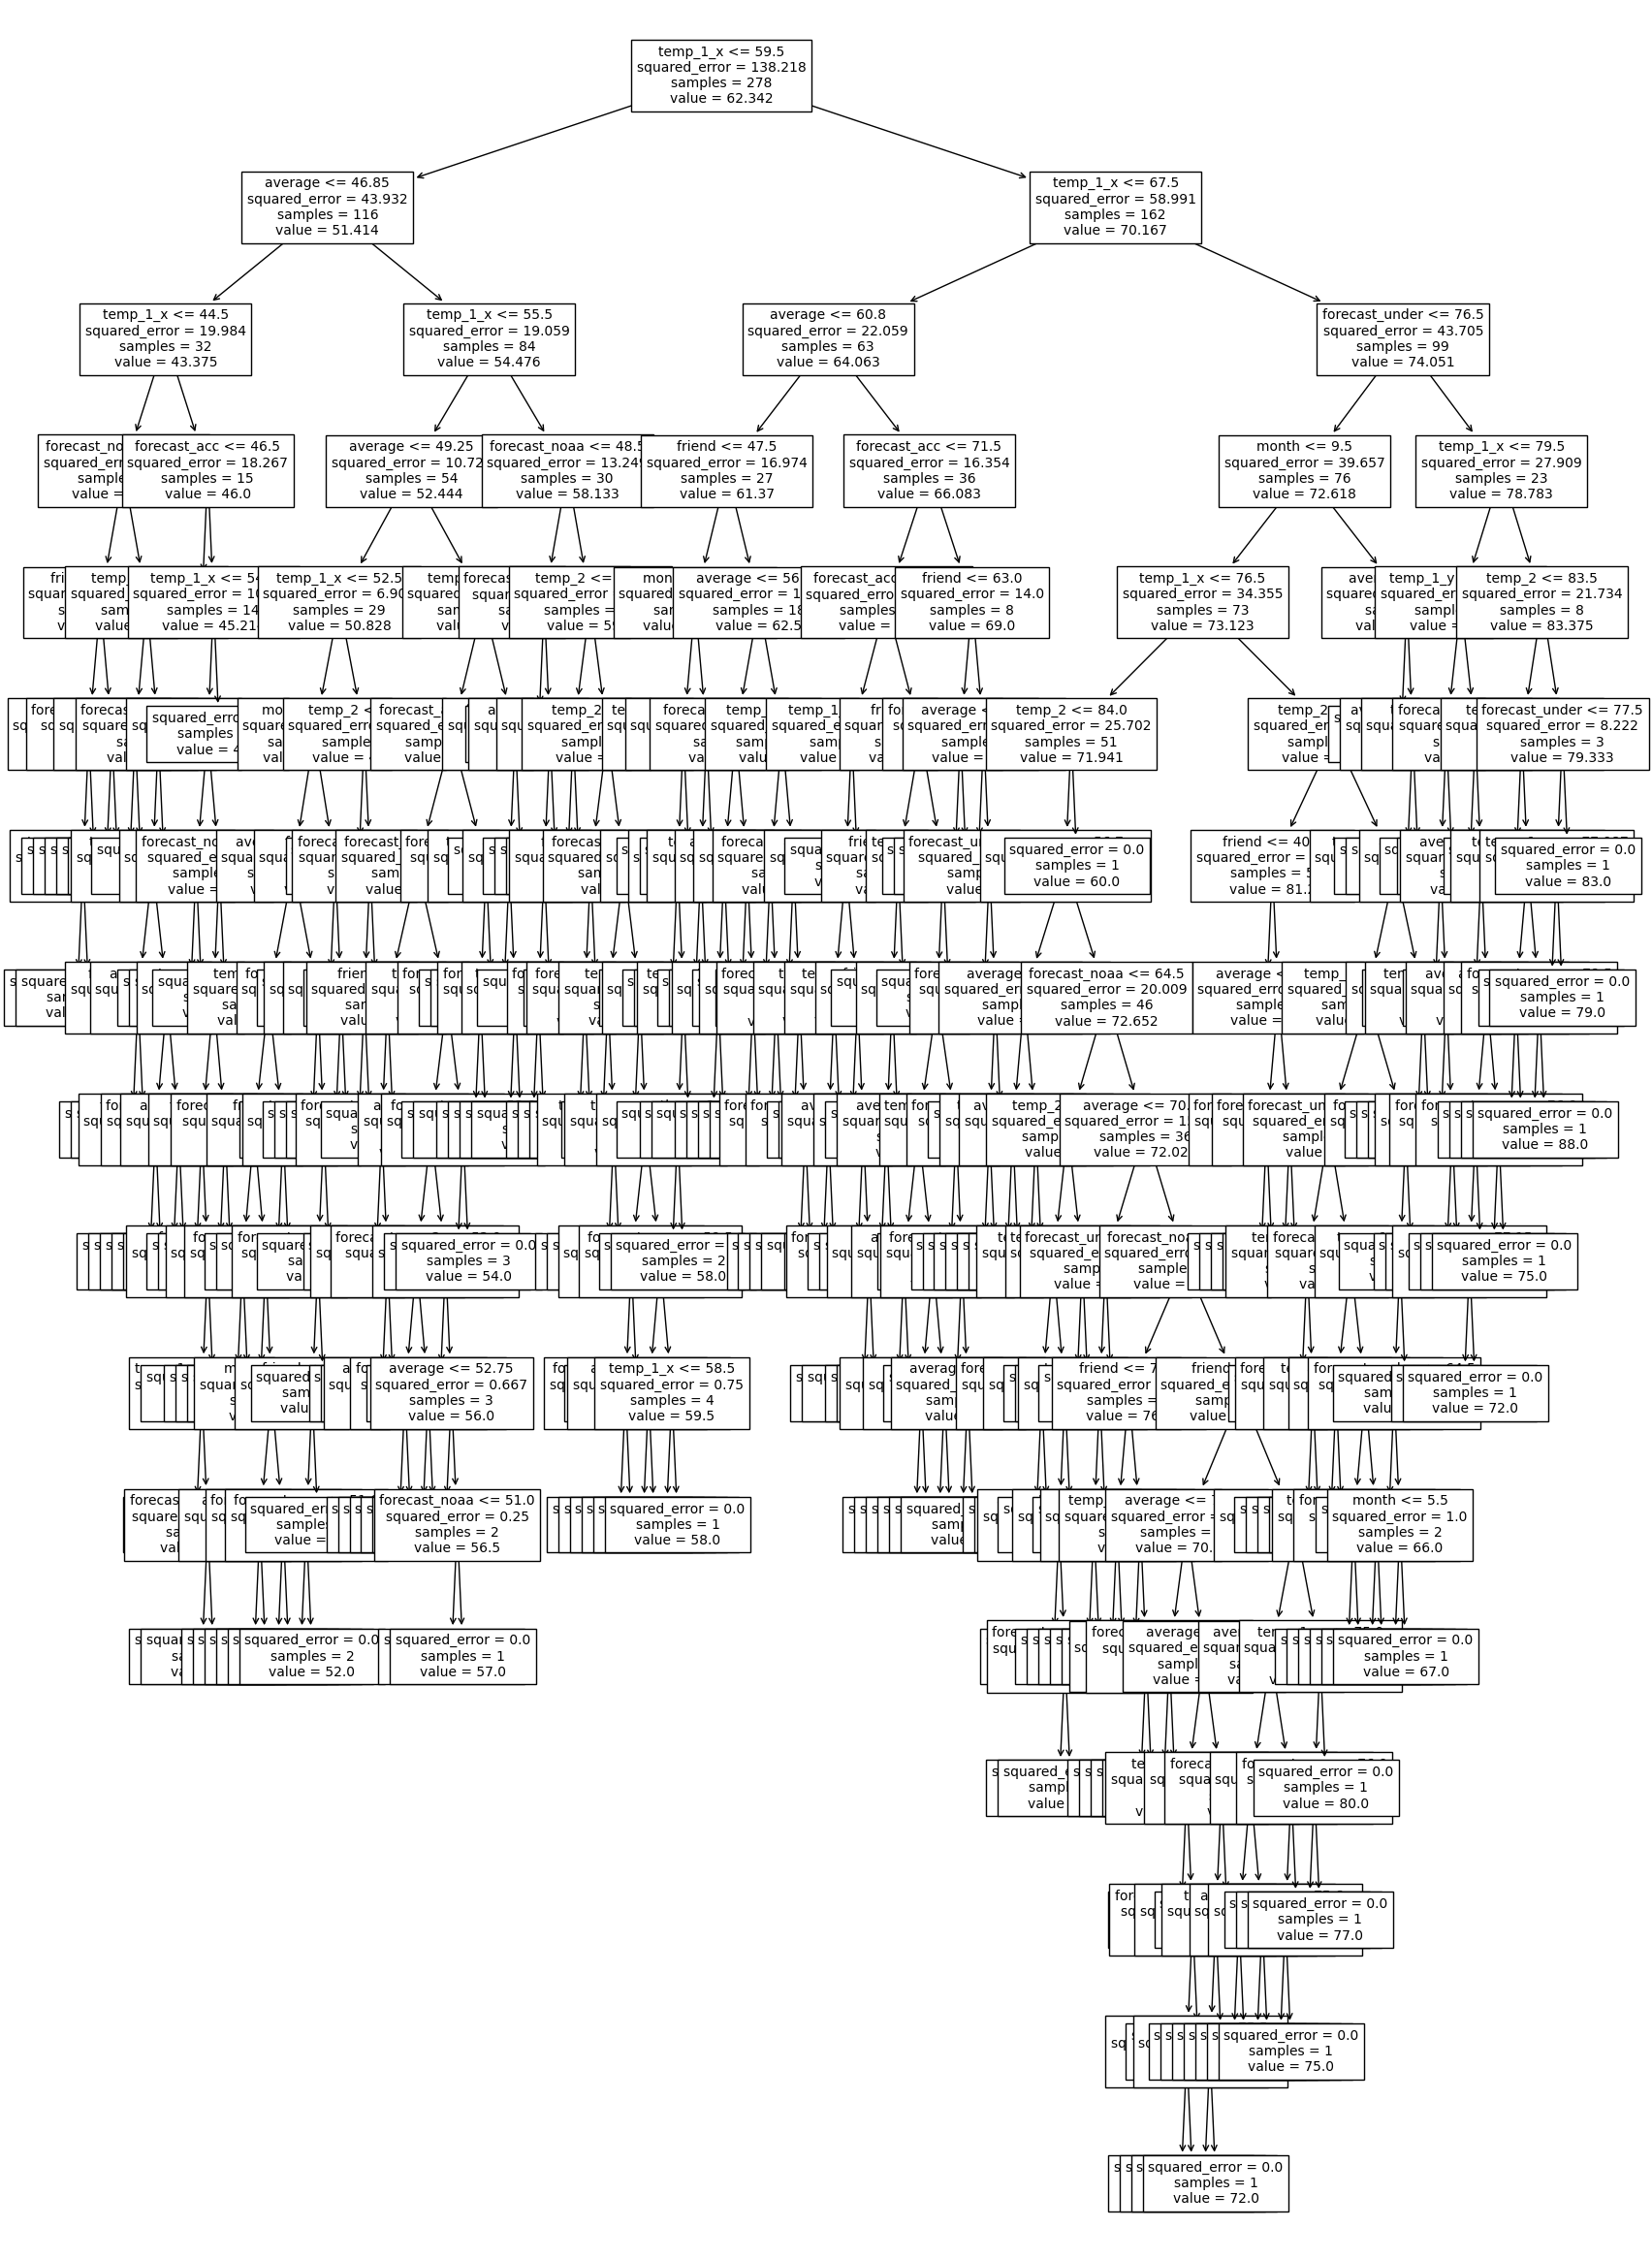

In [57]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [58]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [59]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

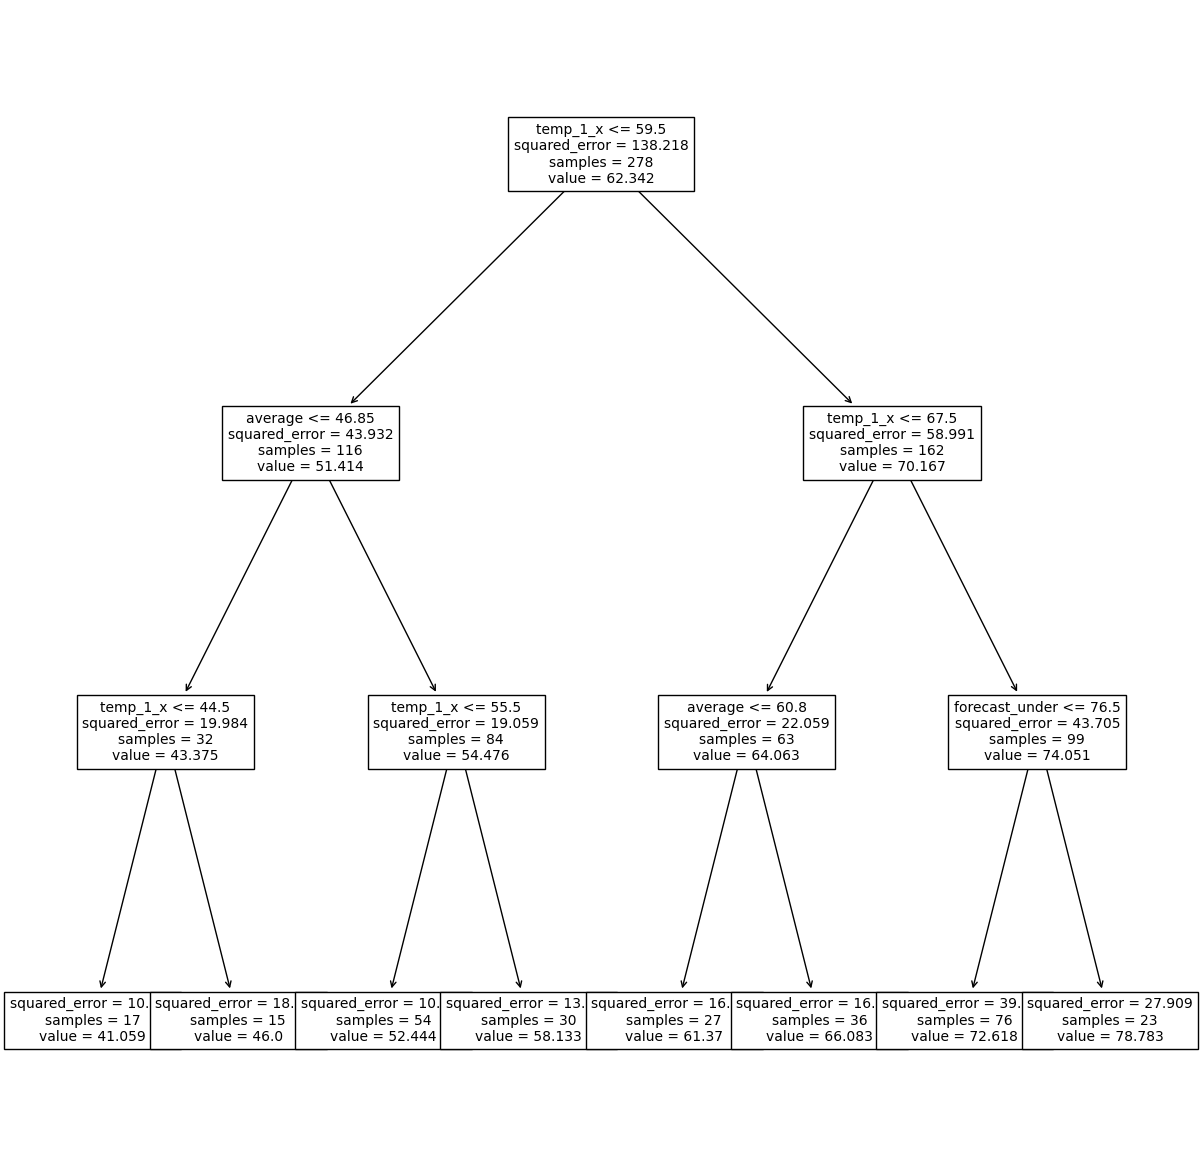

In [60]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [61]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [62]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [64]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
2,temp_1_x,0.880208
3,average,0.099022
6,forecast_under,0.020771
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


In [180]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_merged[['temp_1_x','average','forecast_under']], df_merged['actual'], test_size=0.2, random_state=42)

In [66]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [67]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [184]:
df_merged

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


In [68]:
# 59 en farenheit

df["target_clas"] = df_merged["actual"] < 60
df_merged["target_clas"] = df_merged["actual"] < 60
df_merged

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y,target_clas
0,1,45,45,45.6,45,43,50,44,29,49.677419,True
1,1,44,45,45.7,44,41,50,44,61,49.677419,True
2,1,45,44,45.8,41,43,46,47,56,49.677419,True
3,1,44,41,45.9,40,44,48,46,53,49.677419,True
4,1,41,40,46.0,44,46,46,46,41,49.677419,True
...,...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935,True
344,12,42,47,45.3,48,41,49,44,58,43.741935,True
345,12,47,48,45.3,48,43,50,45,65,43.741935,True
346,12,48,48,45.4,57,44,46,44,42,43.741935,True


<Axes: >

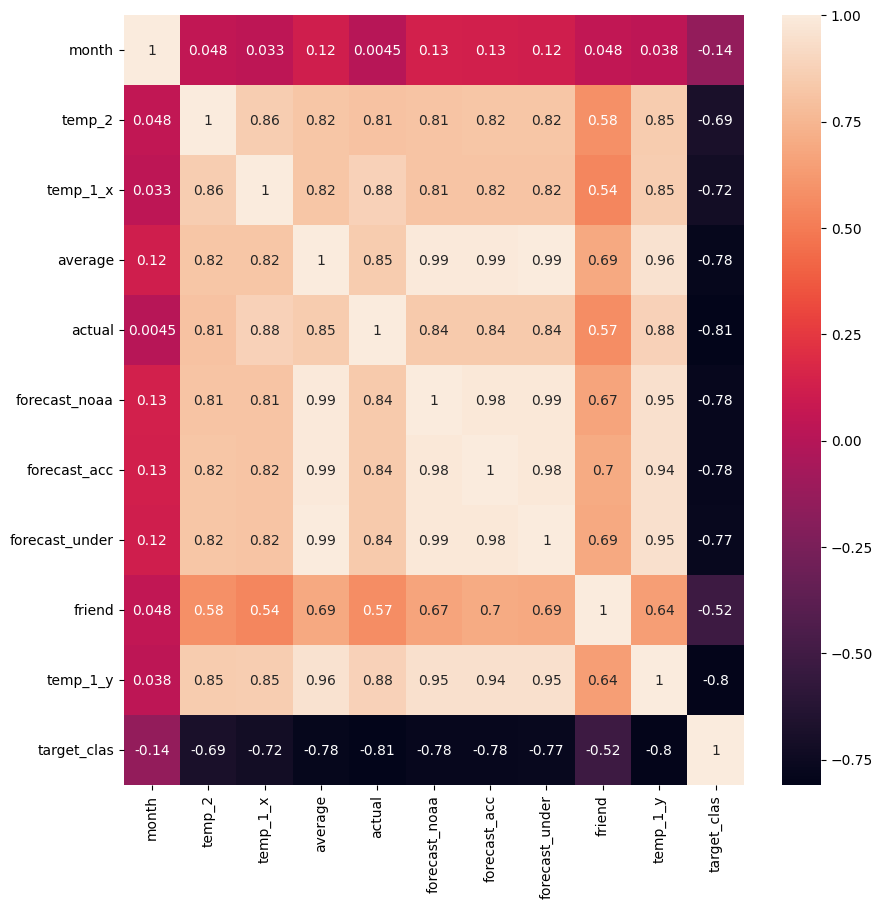

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df_merged.corr(), annot=True)

In [81]:
df['target_clas'].value_counts(normalize=True)

target_clas
False    0.586207
True     0.413793
Name: proportion, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [90]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [91]:
X_train.columns

Index(['month', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc',
       'forecast_under', 'friend'],
      dtype='object')

In [92]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 ])

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9142857142857143

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc',
       'forecast_under', 'friend'],
      dtype='object')

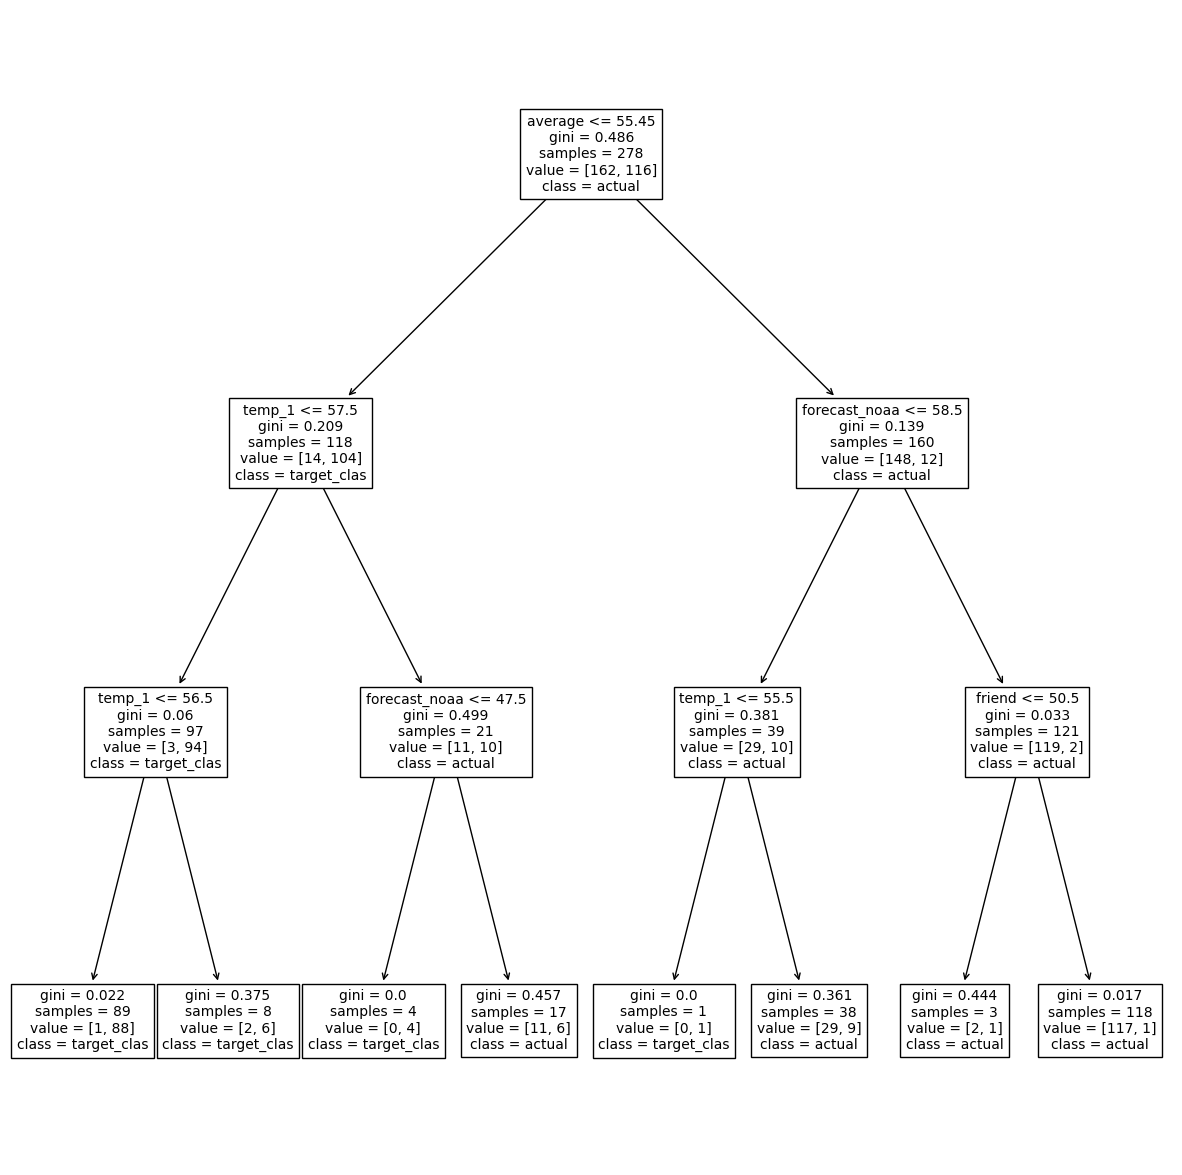

In [95]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = ['actual', 'target_clas'], fontsize=10); #max_depth cambia la profundidad de la visualización

In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

0.9285714285714286

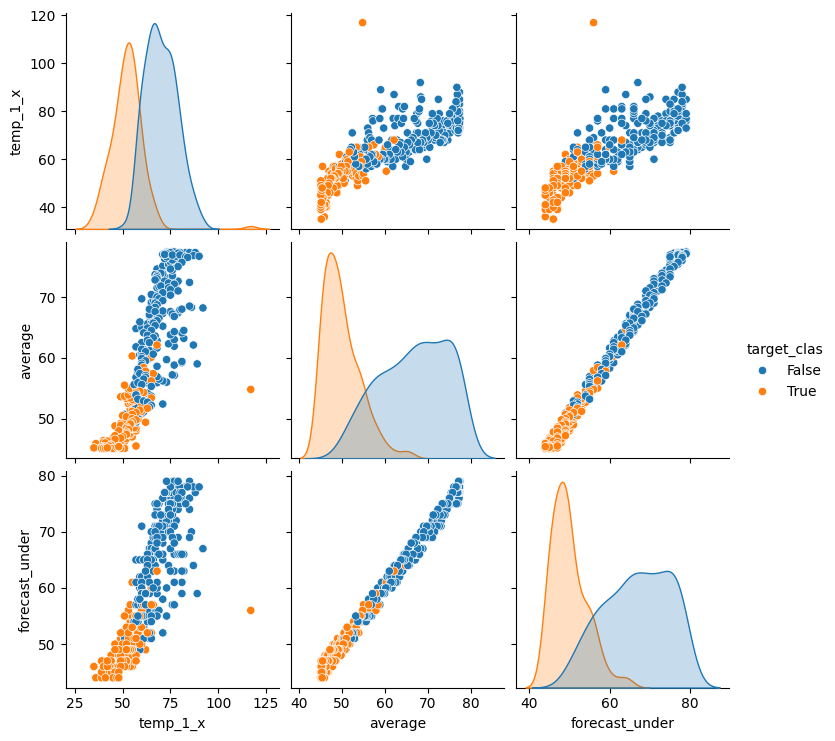

In [98]:
sns.pairplot(df_merged[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')